In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKKMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment

# dataset loading

In [2]:
df =  pd.read_csv('data/iris.csv')
df.drop(columns=['Id'], inplace=True, axis=1)
X = df.drop(columns=['Species'])
y = df['Species']  # Tách nhãn
X = X.values
y = LabelEncoder().fit_transform(y)

# KMeans from Scratch

In [3]:
class Kmeans:
    def __init__(self, K):
        assert K > 0, "K should be a positive integer."
        self.K = K
        self.centroids = None

    def init_centroids(self, X):
        assert X.shape[0] >= self.K, "Number of data points should be greater than or equal to K."
        random_indices = np.random.choice(X.shape[0], self.K, replace=False)
        self.centroids = X[random_indices]

    def assign_clusters(self, X):
        # Tính khoảng cách từ mỗi điểm dữ liệu đến từng centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Trả về chỉ số centroid gần nhất cho mỗi điểm
        return np.argmin(distances, axis=1)

    def compute_mean(self, X, points):
        # Tính lại centroid mới bằng cách lấy trung bình các điểm trong mỗi cụm
        return np.array([X[points == k].mean(axis=0) for k in range(self.K)])

    def fit(self, X, max_iter=100):
        # Khởi tạo centroid ban đầu
        self.init_centroids(X)

        for _ in range(max_iter):
            # Gán nhãn cụm cho từng điểm
            points = self.assign_clusters(X)

            # Tính lại centroid
            new_centroids = self.compute_mean(X, points)

            # Nếu centroid không thay đổi nữa thì dừng lại (hội tụ)
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        return self.centroids, points

In [4]:
model = Kmeans(3)
centroids, points = model.fit(X, 100)

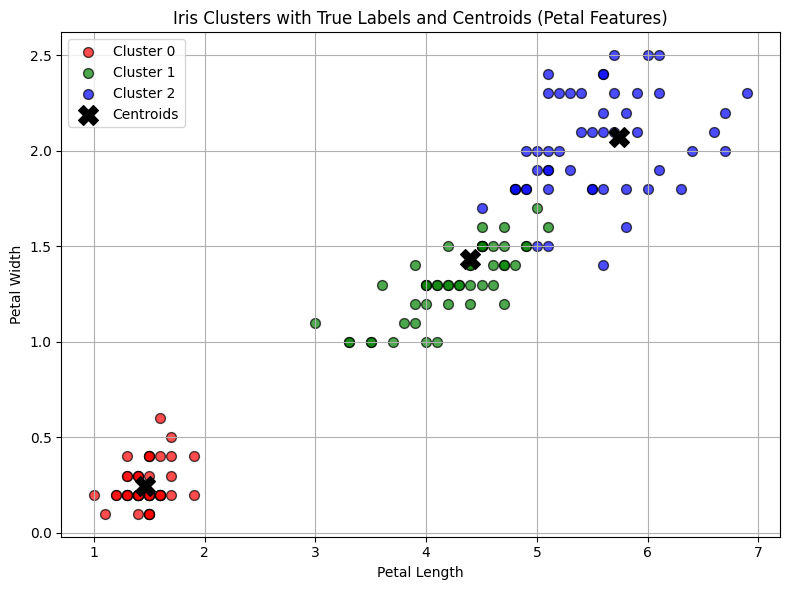

In [5]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for cluster_id, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X[y == cluster_id, 2], X[y == cluster_id, 3],
                c=color, s=50, edgecolor='k', alpha=0.7, label=label)

# centroid
plt.scatter(centroids[:, 2], centroids[:, 3],
            c='black', s=200, marker='X', label='Centroids')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Clusters with True Labels and Centroids (Petal Features)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [6]:
def calculate_kmeans_accuracy(y_true, y_pred):
    if y_true.dtype == 'O':
        y_true = LabelEncoder().fit_transform(y_true)

    D = max(y_pred.max(), y_true.max()) + 1
    confusion_matrix = np.zeros((D, D), dtype=np.int64)
    for i in range(len(y_true)):
        confusion_matrix[y_pred[i], y_true[i]] += 1

    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    mapping = dict(zip(row_ind, col_ind))
    y_pred_mapped = np.array([mapping[label] for label in y_pred])

    return accuracy_score(y_true, y_pred_mapped)

In [7]:
acc_scratch = calculate_kmeans_accuracy(y, points)
print(f"KMeans Scratch Accuracy: {acc_scratch*100:.2f}%")

KMeans Scratch Accuracy: 89.33%


# KMeans from sklearn

In [8]:
kmeans_sklearn = SKKMeans(n_clusters=3, n_init=100, random_state=42)
y_pred_sklearn = kmeans_sklearn.fit_predict(X)

In [11]:
acc_sklearn = calculate_kmeans_accuracy(y, y_pred_sklearn)
print(f"KMeans scikit-learn Accuracy: {acc_sklearn*100:.2f}%")

KMeans scikit-learn Accuracy: 89.33%
